# Objective

**Day 6 of the [#30DayChartChallenge challenge](https://github.com/Z3tt/30DayChartChallenge_Collection2021/blob/main/README.md)**

**Topic: 6. experimental**

Used Dataset: self

Code source: https://github.com/CarlosFocil/mandalapy/blob/master/mandalapy_notebook.ipynb

# Setup

In [135]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from math import pi

# Data

In [166]:
# Modify the following parameters in order to get different figures
it = 3 # Number of iterations (how many times the equidistant points will be generated)
points = 14 # Number of points to draw
radius = 3 # Factor of expansion or compression
f1,f2 = 10,10 # Figure size

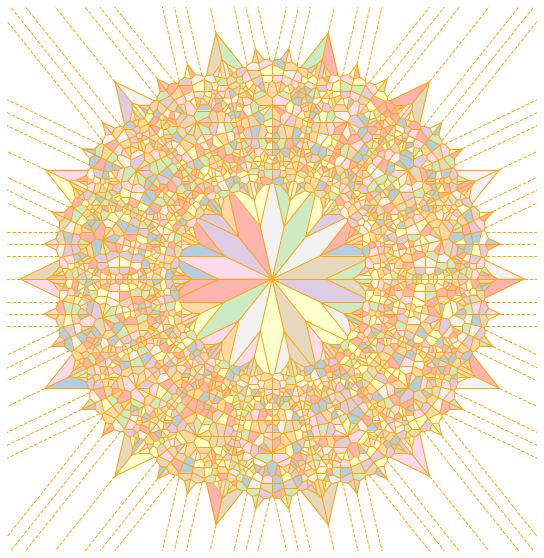

None


In [171]:
def MandalaPy(it,points,radius):
    angles = np.linspace(0,2*pi*(1-1/points), points) + pi/2
    x,y = 0,0
    df = pd.DataFrame([[x,y]], columns = ['x','y']) #Initial center
    #Itearate over centers
    for k in range(it):
        t1 = np.array([])
        t2 = np.array([])
        for i in range(df.shape[0]):
            t1 = np.append(t1,df['x'][i]+radius**(k)*np.cos(angles))
            t2 = np.append(t2,df['y'][i]+radius**(k)*np.sin(angles))
        df = pd.DataFrame(np.column_stack((t1,t2)), columns = ['x','y'])
        
    mandala = Voronoi(df)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0], fig_size[1] = f1,f2
    voronoi_plot_2d(mandala, show_points = False, show_vertices = False, line_colors='orange'), plt.axis('off'),
    plt.gca().set_aspect('equal', adjustable='box'), plt.savefig('mandala2.png', dpi = 100)
    
    speed = np.random.uniform(low=0.0, high=5.0, size=len(df))
    # find min/max values for normalization
    minima = min(speed)
    maxima = max(speed)

    # normalize chosen colormap
    norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Pastel1)
    for r in range(len(mandala.point_region)):
        region = mandala.regions[mandala.point_region[r]]
        if not -1 in region:
            polygon = [mandala.vertices[i] for i in region]
            plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r]))
    plt.savefig("../plots/Day6_experimental.png")
    return plt.show()

print(MandalaPy(it,points,radius))